<a href="https://colab.research.google.com/github/tb000330/BPA_Lab/blob/main/1_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
# matplotlib.use('TkAgg')
# %matplotlib inline

pd.options.display.float_format = '{:.10f}'.format

## #1. 전처리

In [ ]:
## 1. 전처리
df = pd.read_csv('/content/drive/MyDrive/학교/LAB/항법세트.csv')
df = df.drop(['사업장명', '검사구분', '자재코드', '자재명', '샘플번호', '검사키'], axis=1)

str_list = ['식별번호 일치여부', '부품 정상조립 여부', '보호피막 처리 누락 및 결함여부', 'S/W 버전 확인_PC전시화면', 'S/W 버전 확인_시험 프로그램', '초기고장배제 진동시험, 온도시험']

# 검사항목 pass/unpass drop
for s in str_list:
    df = df[df['검사항목']!=s]

## #2. 검사항목 별 검사값 상관계수

In [ ]:
## 2. 검사항목 별 검사값 상관계수
df = df[['검사요청번호', '검사항목', '검사값']]
df_cor = df.pivot_table(index='검사요청번호', columns='검사항목', values='검사값')
df_cor.columns = ['pe_head', 'att_head', 'pe_pitch', 'att_pitch', 'pe_roll', 'att_roll', 'current', 'voltage', 'pe_repeat', 'weight', 'set_0', 'set_180', 'set_90', 'set_270']

pear = df_cor.corr(method='pearson')

# 정규화 후 상관관계
scaler = MinMaxScaler() # MinMaxScaler
scaler.fit(df_cor)
df_cor_scaled = scaler.transform(df_cor)
df_cor_scaled = pd.DataFrame(df_cor_scaled)
pear_minmax = df_cor.corr(method='pearson')

# mil -> m 변환 후 상관관계
m_mil = df_cor.copy()
m_mil['set_0'] = m_mil['set_0'] * 0.001
m_mil['set_180'] = m_mil['set_180'] * 0.001
m_mil['set_90'] = m_mil['set_90'] * 0.001
m_mil['set_270'] = m_mil['set_270'] * 0.001
pear_m_mil = m_mil.corr(method='pearson')


In [ ]:
pear_minmax

,pe_head,att_head,pe_pitch,att_pitch,pe_roll,att_roll,current,voltage,pe_repeat,weight,set_0,set_180,set_90,set_270
pe_head,1.0000000000,-0.1342848639,0.0388429177,-0.0365063579,-0.0178101449,-0.0348703121,-0.0593903640,-0.1287086803,-0.0612652242,0.0469101171,0.0560968771,0.0105467557,0.1128925926,-0.1209012883
att_head,-0.1342848639,1.0000000000,0.0684665962,0.4143875433,0.1048223754,0.3456534514,0.0860725282,0.0852495123,0.0669056336,-0.1716475003,-0.0615315276,0.1570208846,0.1675910725,0.0291780867
pe_pitch,0.0388429177,0.0684665962,1.0000000000,0.0139953888,0.9687363092,-0.0786239848,0.2378474485,0.2678700599,-0.0067985845,-0.4571980423,-0.1169341914,0.1635619417,-0.0771004132,0.1217476273
att_pitch,-0.0365063579,0.4143875433,0.0139953888,1.0000000000,0.0023076205,0.9608102202,-0.0892379159,0.0399082415,0.1145367667,-0.1823658126,-0.1234511161,-0.0260606396,0.0472261132,0.0060311416
pe_roll,-0.0178101449,0.1048223754,0.9687363092,0.0023076205,1.0000000000,-0.1038329727,0.2185050041,0.3201420882,-0.0292039387,-0.4253088213,-0.1262354968,0.1519313252,-0.0816987078,0.0896359520
att_roll,-0.0348703121,0.3456534514,-0.0786239848,0.9608102202,-0.1038329727,1.0000000000,-0.0818191404,-0.0324818742,0.0789334281,-0.1628151201,-0.1214365926,-0.0406737944,0.0610601954,0.0164183362
current,-0.0593903640,0.0860725282,0.2378474485,-0.0892379159,0.2185050041,-0.0818191404,1.0000000000,0.0950705603,0.0614310223,-0.3203267060,0.2198901619,0.2469566951,0.1348217222,0.2129398564
voltage,-0.1287086803,0.0852495123,0.2678700599,0.0399082415,0.3201420882,-0.0324818742,0.0950705603,1.0000000000,0.0928784682,0.0260384446,-0.1425668337,0.0367210157,-0.1510643051,0.0462330143
pe_repeat,-0.0612652242,0.0669056336,-0.0067985845,0.1145367667,-0.0292039387,0.0789334281,0.0614310223,0.0928784682,1.0000000000,-0.0386472962,0.1646964176,-0.0149117970,0.0695607547,0.0330281784
weight,0.0469101171,-0.1716475003,-0.4571980423,-0.1823658126,-0.4253088213,-0.1628151201,-0.3203267060,0.0260384446,-0.0386472962,1.0000000000,0.0883275263,-0.1095328712,-0.0699464075,-0.0540237904


## #3. 그룹화

### (1) Kmeans

In [ ]:
## 3. Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

def visualize_kmeans_plot_multi(cluster_lists, X_features):
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(6 * n_cols, 4), nrows=1, ncols=n_cols)

    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        clusterer = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster'] = cluster_labels

        unique_labels = np.unique(clusterer.labels_)
        markers = ['o', 's', '^', '*', 'p', 'x', '1', '2']

        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster'] == label]
            if label == -1:
                cluster_legend = 'Noise'
            else:
                cluster_legend = 'Cluster ' + str(label)
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : ' + str(n_cluster))
        axs[ind].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.subplots_adjust(wspace=1, hspace=1)

    plt.show()

In [ ]:
# kmeans_df_cor = df_cor.T
# visualize_kmeans_plot_multi([3,4,8], kmeans_df_cor)

In [ ]:
# for i in range(9,10):
#   kmeans = KMeans(n_clusters=i, random_state=0)
#   kmeans_labels = kmeans.fit_predict(kmeans_df_cor)
#   kmeans_df_cor['kmeans_labels'+str(i)] = kmeans_labels

# print(kmeans_df_cor.groupby('kmeans_labels3')['kmeans_labels3'].count())
# print(kmeans_df_cor.groupby('kmeans_labels4')['kmeans_labels4'].count())
# print(kmeans_df_cor.groupby('kmeans_labels8')['kmeans_labels8'].count())

### (2) 도메인

In [ ]:
group1 = df_cor[['pe_repeat','att_head']]
group2 = df_cor[['pe_head','pe_pitch','pe_roll']]
group3 = df_cor[['att_pitch', 'att_roll']]
group4 = df_cor[['set_0','set_90']]
group5 = df_cor[['set_180', 'set_270']]
group6 = df_cor['current']
group7 = df_cor['voltage']
group8 = df_cor['weight']

## #4. 최대우도추정법

### (1) 가우시안 분포 가정 

In [ ]:
# kstest test
import numpy as np
from scipy.stats import kstest

result = []
for col in df_cor.columns:
  col_i = df_cor[col]
  kstest_test = kstest(col_i, 'norm')
  if kstest_test[1] < 0.01: # p-values < 0.01
    result.append([col,round(kstest_test[1], 6),'abnormal'])
  else:
    result.append([col,round(kstest_test[1], 6),'normal'])

result

[['pe_head', 0.0, 'abnormal'],
 ['att_head', 0.0, 'abnormal'],
 ['pe_pitch', 0.0, 'abnormal'],
 ['att_pitch', 0.0, 'abnormal'],
 ['pe_roll', 0.0, 'abnormal'],
 ['att_roll', 0.0, 'abnormal'],
 ['current', 0.0, 'abnormal'],
 ['voltage', 0.0, 'abnormal'],
 ['pe_repeat', 0.0, 'abnormal'],
 ['weight', 0.0, 'abnormal'],
 ['set_0', 0.0, 'abnormal'],
 ['set_180', 0.0, 'abnormal'],
 ['set_90', 0.0, 'abnormal'],
 ['set_270', 0.0, 'abnormal']]

In [ ]:
# normaltest test
import numpy as np
from scipy.stats import normaltest

result = []
for col in df_cor.columns:
  col_i = df_cor[col]
  normal_test = normaltest(col_i)
  if normal_test[1] < 0.01: # p-values < 0.01
    result.append([col,round(normal_test[1], 6),'abnormal'])
  else:
    result.append([col,round(normal_test[1], 6),'normal'])

result

[['pe_head', 0.0, 'abnormal'],
 ['att_head', 0.04502, 'normal'],
 ['pe_pitch', 0.0, 'abnormal'],
 ['att_pitch', 0.830854, 'normal'],
 ['pe_roll', 0.0, 'abnormal'],
 ['att_roll', 0.00162, 'abnormal'],
 ['current', 0.0, 'abnormal'],
 ['voltage', 0.0, 'abnormal'],
 ['pe_repeat', 0.108571, 'normal'],
 ['weight', 0.018096, 'normal'],
 ['set_0', 0.159406, 'normal'],
 ['set_180', 0.069888, 'normal'],
 ['set_90', 0.022364, 'normal'],
 ['set_270', 0.676104, 'normal']]

In [ ]:
# Shapiro test
import numpy as np
from scipy.stats import shapiro

result = []
for col in df_cor.columns:
  col_i = df_cor[col]
  shapiro_test = shapiro(col_i)
  if shapiro_test[1] < 0.01:
    result.append([col,round(shapiro_test[1], 6),'abnormal'])
  else:
    result.append([col,round(shapiro_test[1], 6),'normal'])

result

[['pe_head', 0.0, 'abnormal'],
 ['att_head', 0.032653, 'normal'],
 ['pe_pitch', 0.0, 'abnormal'],
 ['att_pitch', 0.421559, 'normal'],
 ['pe_roll', 0.0, 'abnormal'],
 ['att_roll', 0.016053, 'normal'],
 ['current', 0.0, 'abnormal'],
 ['voltage', 0.0, 'abnormal'],
 ['pe_repeat', 0.136286, 'normal'],
 ['weight', 0.0, 'abnormal'],
 ['set_0', 0.076, 'normal'],
 ['set_180', 0.048658, 'normal'],
 ['set_90', 0.122861, 'normal'],
 ['set_270', 0.633285, 'normal']]

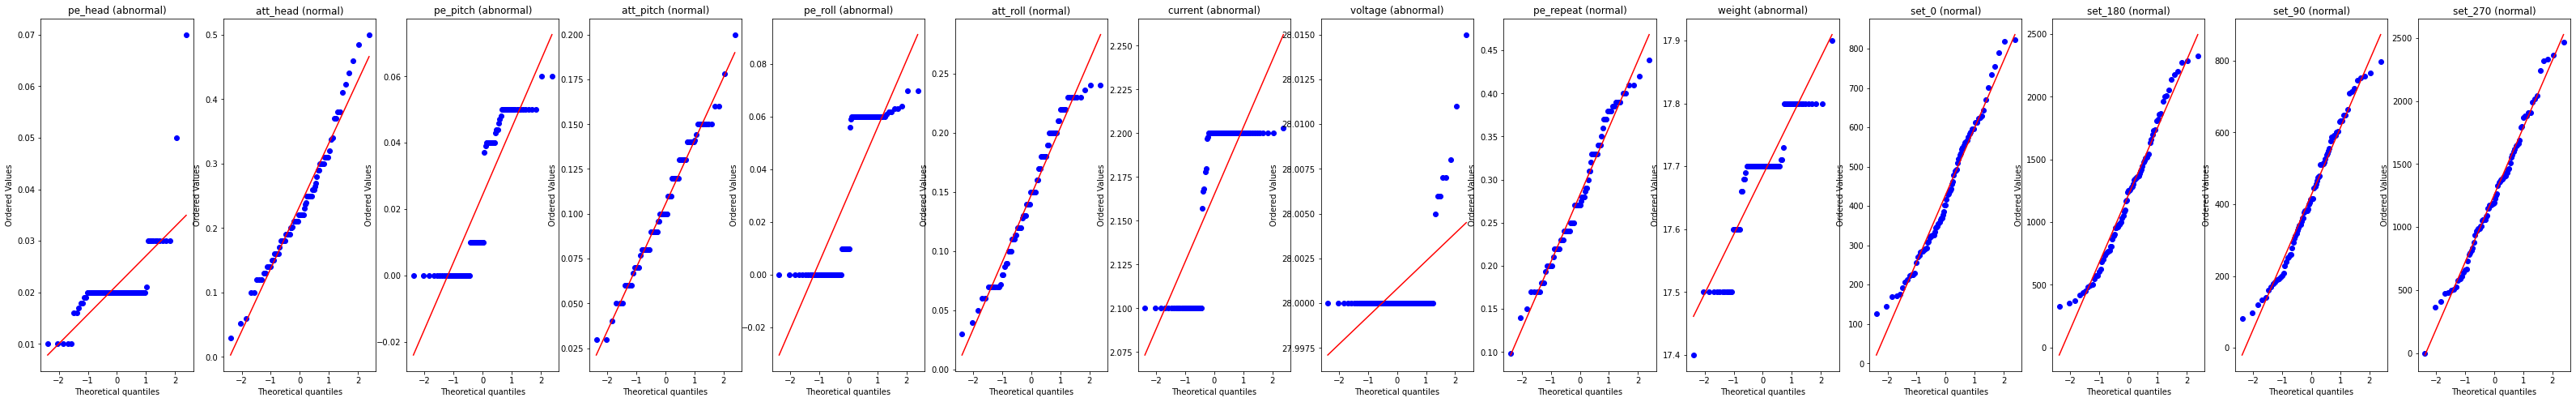

In [ ]:
import scipy.stats as stats
from scipy.stats import probplot

n_cols = df_cor.shape[1]
fig, axs = plt.subplots(figsize=(4*n_cols, 8), nrows=1, ncols=n_cols)

for inx, col in enumerate(df_cor.columns):
  probplot(df_cor[col], dist=stats.norm, plot=axs[inx])
  axs[inx].set_title(str(col) + ' (' + (result[inx][2]) +  ')')

- ** group1[pe_repeat,att_head] -> normal, normal **
- group2[pe_head,pe_pitch,pe_roll] -> abnormal, abnormal, abnormal
- ** group3[att_pitch,att_roll] -> normal, normal **
- ** group4[set_0,set_90] -> normal, normal **
- ** group5[set_180,set_270] -> normal, normal **
- group6[current] -> abnormal
- group7[voltage] -> abnormal
- group8[weight] -> abnormal

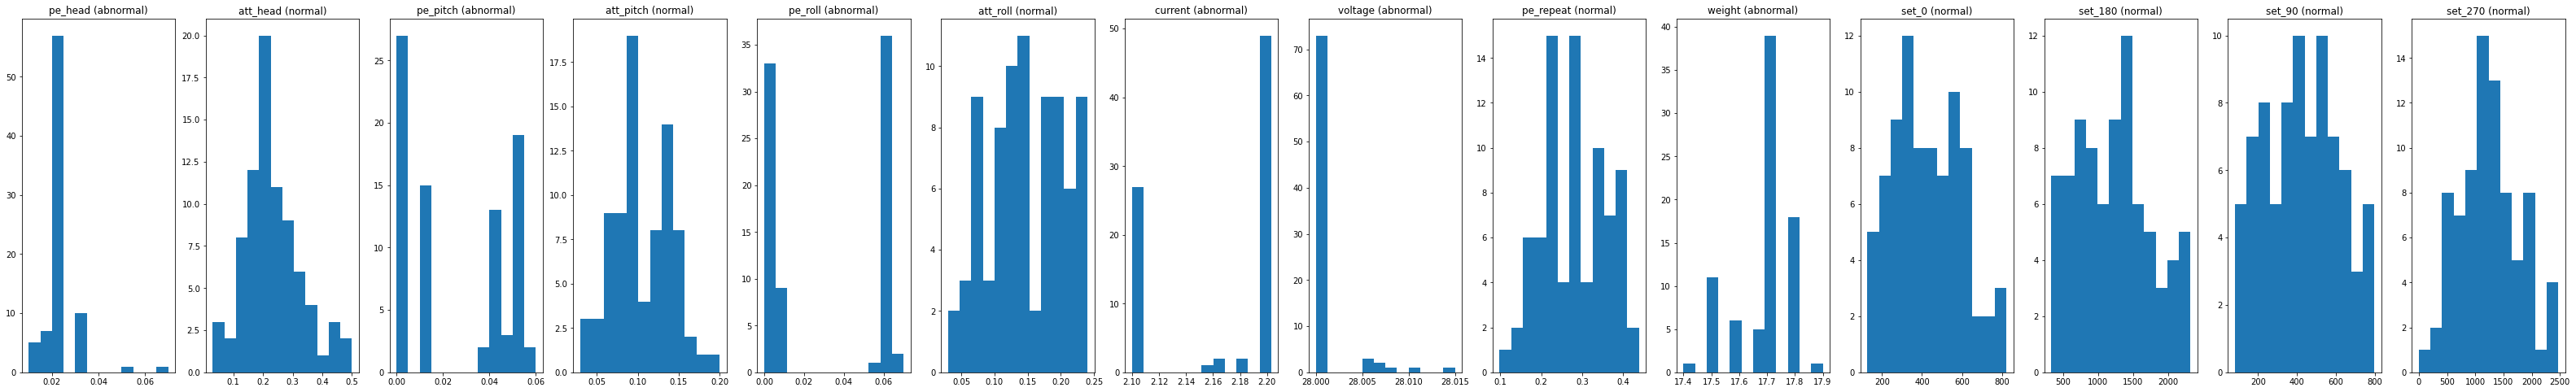

In [ ]:
n_cols = df_cor.shape[1]
fig, axs = plt.subplots(figsize=(4*n_cols, 8), nrows=1, ncols=n_cols)

for inx, col in enumerate(df_cor.columns):
  axs[inx].hist(df_cor[col], bins=12)
  axs[inx].set_title(str(col) + ' (' + (result[inx][2]) +  ')')

#### group1

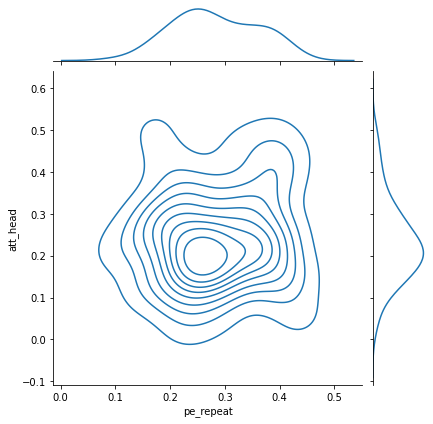

In [ ]:
joint = sns.jointplot(x=group1['pe_repeat'], y=group1['att_head'], kind='kde')
plt.show()

In [ ]:
group1['pe_repeat'].describe()

count   81.0000000000
mean     0.2823580247
std      0.0772928374
min      0.0980000000
25%      0.2300000000
50%      0.2700000000
75%      0.3400000000
max      0.4390000000
Name: pe_repeat, dtype: float64

In [ ]:
## test == 후에 새로 들어올 데이터
num_of_train = int(len(group1['pe_repeat'].values) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
num_of_test = int(len(group1['pe_repeat'].values) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
train = group1['pe_repeat'][:num_of_train]
test = group1['pe_repeat'][:num_of_test]
print('train 데이터 개수: ', len(train))
print('test 데이터개수: ',len(test))

train 데이터 개수:  64
test 데이터개수:  17


Text(0, 0.5, 'f(x)')

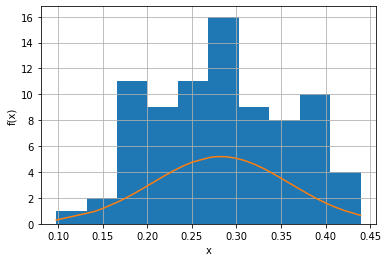

In [ ]:
## pe_repeat변수 데이터 전체 분포
def gaussian(x, mean, std):
  return (1 / np.sqrt(2*np.pi * std ** 2)) * np.exp(- (x - mean)**2 / (2*std**2))

x = np.sort(group1['pe_repeat'].values)
y = gaussian(x, x.mean(), x.std())
group1['pe_repeat'].hist(bins=10)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

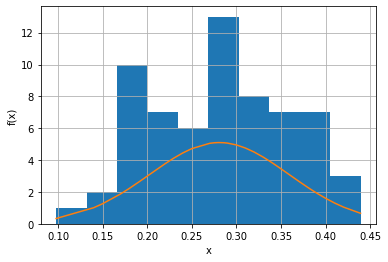

In [ ]:
## pe_repeat변수 train 데이터 분포
def gaussian(x, mean, std):
  return (1 / np.sqrt(2*np.pi * std ** 2)) * np.exp(- (x - mean)**2 / (2*std**2)) # 정규분포 PDF

x = np.sort(train.values)
y = gaussian(x, x.mean(), x.std()) # 각 데이터 별 우도
train.hist(bins=10)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

In [ ]:
# 실제 분포(정규분포x)
print(x.mean())
print(x.std())

0.280796875
0.0782168819068772


In [ ]:
# 우도 모수(정규분포o)
print(y.mean())
print(y.std())

3.470885248543382
1.353216269835301


$$P(x|θ)=∏_{k=1}^{n}P(x_{k}|θ)$$


$$L(θ|x)=logP(x|θ)=∑_{i=1}^{n} logP(x_i|θ)$$

In [ ]:
def mul_likelihood(y):
  mul_likelihood = np.prod(y) # 각 데이터별 우도 곱셈
  return mul_likelihood

def log_mul_likelihood(y):
  mul_likelihood = np.sum(np.log1p(y)) # 각 데이터별 로그우도 곱셈
  return mul_likelihood

print(mul_likelihood(y))
print(log_mul_likelihood(y))

2.4523861771225186e+31
92.16843050061979


$$ \frac{∂}{∂θ}L(θ|x)=\frac{∂}{∂θ}logP(x|θ)=∑_{i=1}^{n}\frac{∂}{∂θ}logP(x_i|θ)=0$$

-

$$\frac{∂L(θ|x)}{∂μ}=−\frac{1}{2σ^2}∑_{i=1}^{n}\frac{ ∂}{∂μ}(x^{2}_{i}−2x_{i}μ+μ^{2})=0$$


In [ ]:
## 최대우도를 만들어주는 모평균, 분산의 추정량
def derivative_mu(x, n):
  # f = -(1/(2*(std**2)) * np.sum((x[i]**2)-(2*[i]*np.mean(x))+np.mean(x)**2))
  est_mu = (1/n) * np.sum(x)
  est_var = (1/n) * np.sum((x-est_mu)**2)
  return est_mu, est_var

est_mu, est_var = derivative_mu(x, len(x))
# plt.plot(est_mu, est_var)
print(est_mu, est_var)

0.280796875 0.006117880615234375


In [ ]:
0.280796875
0.0782168819068772

In [ ]:
class MLE():
    def __init__(self, samples, m, std, learning_rate, epochs, verbose=False):
        """
        :param samples: samples for get MLE
        :param learning_rate: alpha on weight update
        :param epochs: training epochs
        :param verbose: print status
        """
        self._samples = samples
        self._m = m
        self._std = std
        self._learning_rate = learning_rate
        self._epochs = epochs
        self._verbose = verbose


    def likelihood(self, x, M):
        """
        Probability Density Function is Normal distribution
        PDF's y is same as likelihood

        :param x:
        :return: likelihood of input x (likelihood of input x is same as y of pdf)
        """
        # 정규분포 PDF
        return (1 / math.sqrt(2*math.pi) * math.pow(self._std, 2)) * np.exp(-(np.power(x - M, 2) / (2*math.pow(self._std, 2))))


    def fit(self):
        """
        training estimator
        M, which minimizes Likelihood, is obtained by the gradient descent method.
        M is the MLE of the samples
        """

        # init M
        self._estimator = np.random.normal(self._m, self._std, 1) # 정규분포에서 랜덤 샘플링 -> 새로운 값

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):
            likelihood = np.prod(self.likelihood(self._samples, self._m)) # 각 데이터별 우도 곱셈
            prediction = np.prod(self.likelihood(self._samples, self._estimator)) # 새로운 값 들어왔을 때 예측값
            cost = self.cost(likelihood, prediction)
            self._training_process.append((epoch, cost))
            self.update(self._samples, self._estimator)

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self, likelihood, prediction):
        """
        cost function
        :param likelihood: likelihood of population
        :param prediction: likelihood in samples
        :return: the cost of optimizing the parameters
        """
        return math.sqrt(likelihood - prediction)


    def update(self, x, M):
        """
        update in gradient descent
        gradient is approximated
        :param x: samples
        :param M: estimator
        """
        gradient = np.sum(np.exp(-(np.power(x - M, 2) / (2*math.pow(self._std, 2)))))
        if self._m > self._estimator:
            self._estimator += self._learning_rate * gradient
        else:
            self._estimator -= self._learning_rate * gradient


    def get_mle(self):
        """
        parameter getter
        :return: estimator of MLE
        """
        return self._estimator

In [ ]:
if __name__ == "__main__":

    # samples for MLE
    samples = np.array(df_cor['pe_repeat'])

    # assumptions about the population
    mean = np.array(samples.mean())
    std = samples.std()

    # get MLE
    estimator = MLE(samples, mean, std, learning_rate=0.1, epochs=30, verbose=True)
    estimator.fit()
    result = estimator.get_mle()
    print(result)

Iteration: 10 ; cost = 0.0000
Iteration: 20 ; cost = 0.0000
Iteration: 30 ; cost = 0.0000
[5.41453128]


In [ ]:
from pandas.core import describe
df_cor['pe_repeat'].describe()

count    81.000000
mean      0.282358
std       0.077293
min       0.098000
25%       0.230000
50%       0.270000
75%       0.340000
max       0.439000
Name: pe_repeat, dtype: float64

In [ ]:
samples.std()

0.07681423939528356

In [ ]:
np.random.normal(mean, std, 1)

array([0.29645405])

In [ ]:
## 4. 세미 지도학습이므로 가상의 이상치 데이터 생성
# df_cor['class'] = 0

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

# 변수별 히스트그램 생ㄷ서
df_cor_T = df_cor.T

# X, y = make_classification(n_samples=100, n_features=15, n_classes=1, random_state=42)
# len(X[0])

def gaussian(data, x, b=1):
    return np.exp(-x ** 2 / (2 * b ** 2)) / (b * np.sqrt(2 * np.pi))

N = 81
lenDataset = len(df_cor_T)

# normalized histogram of loaded datase
for series in range(len(df_cor_T)):
    series_i = df_cor_T.iloc[series]
    hist, bins = np.histogram(series_i, bins=N, range=(np.min(series_i), np.max(series_i)), density=True)
    width = 0.7 * (bins[1] - bins[0])
    dx = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2

    ##Generate data
    sumPdfSilverman = np.zeros(len(center))
    h = 1.06 * np.std(series_i) * lenDataset ** (-1 / 5.0)

    for j in range(0, lenDataset):
        sumPdfSilverman += ((gaussian(center[:, None] - np.array(series_i), h)) / lenDataset)

    # So here we have to sum 1000 gaussians at generated random x to evaluate probability that this x exists in new generated dataset.
        j = 0
        generatedDataPdfSilverman = np.zeros(1)
        while j < 1:
            randNo = np.random.rand(1) * (np.max(series_i) - np.min(series_i)) - np.absolute(np.min(series_i))
            if np.random.rand(1) <= np.sum((gaussian(randNo - series_i, h)) / lenDataset):
                generatedDataPdfSilverman[j] = randNo
                j += 1

##Plotting
fig, ax = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
# Estimated PDF using Silverman's calculation for h
ax[0, 0].plot(center, sumPdfSilverman, '-k', linestyle="dashed")
ax[0, 0].set_title('KDE, Silvermans bandwidth h=%.2f' % h)
plt.show()

In [ ]:
#Histogram for generated data using KDE and h found using Silverman's method
hist2, bins2 = np.histogram(generatedDataPdfSilverman, bins=N, range=(np.min(data), np.max(data)), density=True)
ax[1,0].bar(center, hist2, align='center', width=width, fc='#AAAAFF')
ax[1,0].set_title('Generated, Silvermans bandwidth h=%.2f' % h)

# #5. 시계열 추세분석

In [ ]:
group1 = df_cor[['pe_repeat','att_head']]
group2 = df_cor[['pe_head','pe_pitch','pe_roll']]
group3 = df_cor[['att_pitch', 'att_roll']]
group4 = df_cor[['set_0','set_90']]
group5 = df_cor[['set_180', 'set_270']]
group6 = df_cor['current']
group7 = df_cor['voltage']
group8 = df_cor['weight']

In [ ]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [ ]:
group1

,pe_repeat,att_head
검사요청번호,,
OQ-20201006-00022,0.2860000000,0.2370000000
OQ-20201029-00010,0.0980000000,0.2100000000
OQ-20201029-00011,0.2750000000,0.2650000000
OQ-20201112-00005,0.1930000000,0.4230000000
OQ-20201119-00011,0.3850000000,0.2020000000
...,...,...
OQ-20220705-00008,0.4100000000,0.1600000000
OQ-20220705-00009,0.2100000000,0.2500000000
OQ-20220718-00008,0.2800000000,0.2000000000


In [ ]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)
result = seasonal_decompose(lim_catfish_sales,model='additive')
fig = result.plot()